<a href="https://colab.research.google.com/github/emmt1998/ML-para-Negocios/blob/main/workshop_04/Workshop_N04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workshop N04: Recomendador parte 2
Dictado por Sergio Valenzuela / sergio@tecnopolis.ai / serginho61@gmail.com

Redactado por Efrain Magaña / emmt1998@gmail.com

Puedes copiar este Jupyter Notebook a tu drive llendo a Archivo-> Guardar una Copia en Drive


# Carga de Dataset
En este workshop usaremos los datos en `ml-latest-small.zip` de https://grouplens.org/datasets/movielens/latest/ el cual corresponde a 100mil ratings y 3600 etiquetas aplicadas a 9000 peliculas por 600 usuarios.

En especifico usaremos los archivos `movies.csv` y `ratings.csv` que estan dentro del zip.

Hay dos metodos para cargar los archivos al ambiente de Google Collab, uno es manual, llendo al icono de carpeta en el costado izquierdo y luego presionar en el icono de un archivo con una flecha hacia arriba, tambien se pueden arrastrar los archivos. 

El otro metodo es ejecutar el siguiente codigo, este copiara el repositorio del curso en el ambiente y por ende copiara los archivos en la carpeta `ML-para-Negocios/workshop_02/ml-latest-small/` en donde ya estan descomprimidos `movies.csv` y `ratings.csv`.

In [1]:
%cd /content/
!rm -r /content/ML-para-Negocios #remueve el repositorio si es que ya se habia cargado
!git clone https://github.com/emmt1998/ML-para-Negocios.git #copia el repositorio

/content
rm: cannot remove '/content/ML-para-Negocios': No such file or directory
Cloning into 'ML-para-Negocios'...
remote: Enumerating objects: 136, done.
remote: Counting objects: 100% (136/136), done.
remote: Compressing objects: 100% (131/131), done.
remote: Total 136 (delta 54), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (136/136), 8.48 MiB | 7.03 MiB/s, done.
Resolving deltas: 100% (54/54), done.


Si revisas en el icono de la carpeta encontraras que se cargo el repositorio al ambiente.

# Libreria Pandas
En esta ocacion usaremos la libreria pandas para trabajar con los archivos. 

En la siguiente pagina encontraras mas informacion sobre la libreria:

* https://pandas.pydata.org/docs/getting_started/index.html

Ejecutmos la siguiente celda para importar la libreria al ambiente.


In [2]:
import pandas as pd #notamos que le asignamos el nombre de pd

# Carga de datos
Primero cargamos los datos a variables para trabajar con ellos.

In [3]:
# Primero seteamos las direcciones en donde estan los archivos a usar
dir_archivos = "/content/ML-para-Negocios/workshop_02/ml-latest-small/"
dir_movies = dir_archivos +"movies.csv"
dir_ratings = dir_archivos + "ratings.csv"

# usamos el metodo de pandas para leer los csv
# primero con las peliculas
peliculas = pd.read_csv(dir_movies)
# aprovechamos de cambiarle los nobmres a las columnas
peliculas.columns = ["peliculaId", "titulo", "generos"]
# y de setear la columna de peliculasId como indice
peliculas = peliculas.set_index("peliculaId")

# ahora con los ratings
notas = pd.read_csv(dir_ratings)
# aprovechamos de cambiarle los nobmres a las columnas
notas.columns = ["usuarioId", "peliculaId", "nota", "momento"]

Podemos invocar a la variable para que se muestren los datos.

Primero invocamos el dataframe `peliculas`, en donde se pueden ver las columnas "peliculaId", "titulo" y "generos". Siendo la columna de "peliculaId" el indice de los datos.

In [4]:
peliculas   #tambien puedes usar peliculas.head(n) con n el numero de datos que quieres ver

,titulo,generos
peliculaId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
193585,Flint (2017),Drama


Invocamos al dataframe `notas`, notamos que el indice en este caso no corresponde a "peliculaId" y tampoco nos conviene que sea, ya que distintos usuarios le han puesto nota a una misma pelicula, por lo que si pusieramos como indice a las peliculas, tendriamos que se repiten varias veces.

In [5]:
notas

,usuarioId,peliculaId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


Tambien podemos pedir una descripcion de los datos.

In [6]:
notas.describe()

,usuarioId,peliculaId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


En esto ultimo podemos notar que la nota promedio es un 3.5 y que solo un 25% de los ratings corresponde a una nota menor a tres, podemos ignorar los resultados de "usuarioId" y "peliculaId" ya que son identificadores y a "momento" puesto que no lo usaremos.

# 1era Heurística de Recomendacion: Ranking de popularidad
Ahora, ¿Como recomiendo peliculas?, si no conozco al usuario lo mas facil es recomendar lo que es mas popular, pero si se habran dado cuenta, los datos que estamos usando no cuentan con un total de visitas. Pero sabemos las peliculas a las cuales cada usuario le dejo una calificacion, con esto podemos contar cuantas calificaciones recibio cada pelicula. Y asumiremos que entre mas calificaciones mas popular es una pelicula. Esto ultimo puede ser completamente falso, pero es una asuncion que nos lleva a una solucion.

In [7]:
# contamos cuantas notas le dejaron a cada pelicula
total_de_votos = notas["peliculaId"].value_counts()
total_de_votos = total_de_votos.to_frame("total_de_votos")
total_de_votos

,total_de_votos
356,329
318,317
296,307
593,279
2571,278
...,...
5986,1
100304,1
34800,1
83976,1


Notamos que los indices son los "peliculaId" y que la cantidad de filas(9724) es igual al del dataframe peliculas. Con esto podemos agregar el total de votos en una columna nueva en el dataframe peliculas. 

In [8]:
# agregamos total_de_votos en una nueva columna en peliculas
peliculas['total_de_votos'] = total_de_votos
peliculas

,titulo,generos,total_de_votos
peliculaId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,110.0
3,Grumpier Old Men (1995),Comedy|Romance,52.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0
5,Father of the Bride Part II (1995),Comedy,49.0
...,...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1.0
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1.0
193585,Flint (2017),Drama,1.0


Con esto ya podemos ordenar de manera descendente, para tener el top 10 de peliculas mas vistas.

In [9]:
# pedimos que primero las ordene y luego que nos muestre las N primeras
N = 10 # se puede cambiar
peliculas.sort_values("total_de_votos", ascending = False).head(N)

,titulo,generos,total_de_votos
peliculaId,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0
110,Braveheart (1995),Action|Drama|War,237.0
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0


Con esto ya tenemos una lista con peliculas a recomendar, mision cumplida!!

# 2era Heurística de Recomendacion: Ranking de mejor evaluadas
Que una pelicula sea popular no nos dice si es buena o no, tal vez haya alguna que sea popular pero que sus calificaciones promedio sean bajas o al reves. 

Entonces en este caso vamos a promediar las calificaciones de cada pelicula y lo agregaremos al dataset peliculas, al igual que con la 1era heurística.

In [10]:
# agrupamos los datos por peliculaId luego se promedian y 
# nos quedamos solo con la columna nota
nota_promedio = notas.groupby("peliculaId") #<- se agrupan los datos por peliculaId
nota_promedio = nota_promedio.mean() #<- promediamos estos grupos
nota_promedio = nota_promedio["nota"] #<- nos quedamos solo con la columna nota
nota_promedio = nota_promedio.to_frame("nota_promedio")
nota_promedio

,nota_promedio
peliculaId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429
...,...
193581,4.000000
193583,3.500000
193585,3.500000


Ahora tenemos las calificaciones promedios para cada pelicula y podemos agregarlo al dataset pelicula.

Pero antes, notamos que la celda anterior podia haberse reducido a dos lineas, como se muestra a continuacion.

In [11]:
# es el mismo procedimiento solo que lo hacemos todo a la vez
nota_promedio = notas.groupby("peliculaId").mean()["nota"].to_frame("nota_promedio")
nota_promedio

,nota_promedio
peliculaId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429
...,...
193581,4.000000
193583,3.500000
193585,3.500000


Ahora si, agregamos la nota promedio al dataset.

In [12]:
# agregamos total_de_votos en una nueva columna en peliculas
peliculas['nota_promedio'] = nota_promedio
peliculas

,titulo,generos,total_de_votos,nota_promedio
peliculaId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,52.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0,2.357143
5,Father of the Bride Part II (1995),Comedy,49.0,3.071429
...,...,...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1.0,4.000000
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1.0,3.500000
193585,Flint (2017),Drama,1.0,3.500000


Con esto ya podemos ordenar de manera descendente, para tener el top 10 de peliculas mejor evaluadas.

In [13]:
# pedimos que primero las ordene y luego que nos muestre las N primeras
N = 10 # se puede cambiar
peliculas.sort_values("nota_promedio", ascending = False).head(N)

,titulo,generos,total_de_votos,nota_promedio
peliculaId,,,,
88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,1.0,5.0
100556,"Act of Killing, The (2012)",Documentary,1.0,5.0
143031,Jump In! (2007),Comedy|Drama|Romance,1.0,5.0
143511,Human (2015),Documentary,1.0,5.0
143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,1.0,5.0
6201,Lady Jane (1986),Drama|Romance,1.0,5.0
102217,Bill Hicks: Revelations (1993),Comedy,1.0,5.0
102084,Justice League: Doom (2012),Action|Animation|Fantasy,1.0,5.0
6192,Open Hearts (Elsker dig for evigt) (2002),Romance,1.0,5.0


Lo logramos, ahora tenemos una lista para recomendar segun la nota promedio...

Espera un momento, ¿esta recomendacion de verdad estara bien?, es decir tienen buenas calificaciones, pero solo una persona las ha visto. Tal vez, sea buena idea el decirle al recomendador que solo nos recomiende por calificacion a las que tengan mas de 100 votos.

In [15]:
# primero le decimos que solo tome las filas que cumplen que en la columna 
# total_de_votos se tengan mas de los votos necesarios para hacer valida la 
# nota_promedio, luego pedimos que las ordene y luego que nos muestre las N primeras
N = 10 # se puede cambiar
votos_necesarios = 100 # son los votos con los que decidimos que una nota promedio es util
peliculas[peliculas["total_de_votos"]>votos_necesarios].sort_values("nota_promedio", ascending = False).head(N)
peliculas.to_csv("/content/peliculas.csv")

Ahora si, tenemos una lista con recomendaciones por calificaciones que nos da resultados mas confiables.

# 3era Heuristica de Recomendacion: Usuarios similares
Primero veamos un ejemplo, tenemos tres usuarios y queremos recomendarle una pelicula a Sergio. A la vista se nos ocurre que tal vez Padre Gallo seria una buena recomendacion, ya que las calificaciones de Naomi para El Padrino y Pretty Woman son las mas parecidas a las de Sergio, y asumimos entonces que tienen gustos parecidos.

<img src="https://raw.githubusercontent.com/emmt1998/ML-para-Negocios/main/workshop_04/UsuariosPeliculas.png" height="200">

Pero a una maquina no se le puede decir que decida al ojo, asi que tenemos que formalizar el proceso que realizamos intituivamente.

Para esto podemos decir que el usuario que este mas cerca de otro, es similar.

¿Como sabemos la distancia entre usuarios? Pues podemos ver las calificaciones de peliculas como un espacio vectorial, asi en el `eje X` tenemos las notas de Pretty Woman y en el `eje Y` las del El Padrino.


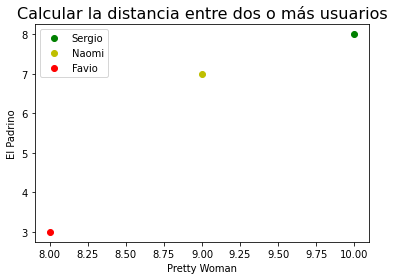

In [18]:
import matplotlib.pyplot as plt
plt.plot(10, 8, "go")
plt.plot(9, 7, "yo")
plt.plot(8, 3, "ro")
plt.legend(["Sergio", "Naomi","Favio"])
plt.title("Calcular la distancia entre dos o más usuarios", fontsize='16')
plt.xlabel("Pretty Woman")
plt.ylabel("El Padrino")
plt.show()

Si nos fijamos, podemos formar unos triangulos rectangulos, en los cuales la distancia entre los puntos es la hiptenusa.

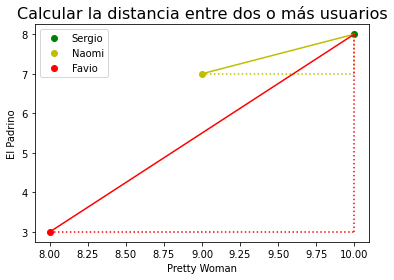

In [26]:
plt.plot(10, 8, "go")
plt.plot(9, 7, "yo")
plt.plot(8, 3, "ro")
plt.legend(["Sergio", "Naomi","Favio"])
plt.title("Calcular la distancia entre dos o más usuarios", fontsize='16')
plt.xlabel("Pretty Woman")
plt.ylabel("El Padrino")

plt.plot([9, 10], [7, 8], color="y", linestyle="-")
plt.plot([9, 10], [7, 7], color="y", linestyle="dotted")
plt.plot([10, 10], [7, 8], color="y", linestyle="dotted")

plt.plot([8, 10], [3, 8], color="r", linestyle="-")
plt.plot([8, 10], [3, 3], color="r", linestyle="dotted")
plt.plot([10, 10],[3, 8], color="r", linestyle="dotted")
plt.show()

Ahora podemos usar pitagoras, para calcular la distancia.

<img src="https://raw.githubusercontent.com/emmt1998/ML-para-Negocios/main/workshop_04/distanciaEuclidiana.jpg" height="200">

Es decir la distancia es:
$$c = \sqrt[2]{(a^{2} + b^{2})}$$

A esta formula tambien se le conoce como norma euclidiana o distancia euclidiana.

Notamos del grafico de los ratings que 
$$a = a(Usuario1,Usuario2) = Usuario1[rPrettyWoman] - Usuario2[rPrettyWoman]$$

Con esto
$$a(Sergio, Naomi) = 10-9 = 1$$

$$a(Sergio, Favio) = 10-8 = 2$$

Lo mismo para $b$
$$b = b(Usuario1, Usuario2) = Usuario1[rElPadrino] - Usuario2[rElPadrino]$$

Con esto
$$b(Sergio, Naomi) = 8-7 = 1$$

$$b(Sergio, Favio) = 8-3 = 5$$

Seguimos con $c$
$$c = distEucli(Usuario1, Usuario2) = \sqrt[2]{(a(Usuario1,Usuario2)^{2} + b(Usuario1, Usuario2)^{2})}$$

Con esto ya podemos calcular las distancias
$$distEucli(Sergio, Naomi) = \sqrt[2]{(a(Sergio,Naomi)^{2} + b(Sergio, Naomi)^{2})} = \sqrt[2]{(1^{2} + 1^{2})}= \sqrt[2]{2} \approx 1.41$$

$$distEucli(Sergio, Favio) = \sqrt[2]{(a(Sergio,Favio)^{2} + b(Sergio, Favio)^{2})} = \sqrt[2]{(2^{2} + 5^{2})}= \sqrt[2]{29} \approx 5.38$$

Ahora implementemoslo usando la libreria `numpy`.

In [30]:
import numpy as np
# definimos las preferencias de cada usuario
# como np.array([rPrettyWoman, rElPadrino])
sergio = np.array([10, 8])
naomi = np.array([9, 7])
favio = np.array([8, 3])

# notamos que al restarlos nos retorna un array de la forma [a, b]
restaSN = sergio - naomi 
restaSF = sergio - favio
print("Sergio - Naomi:",restaSN, "\nSergio - Favio:",restaSF)

Sergio - Naomi: [1 1] 
Sergio - Favio: [2 5]


In [39]:
# Con esto podemos definir la siguiente funcion
def nuestroPitagoras(Usuario1, Usuario2):
  (a, b) = Usuario1 - Usuario2
  return np.sqrt(a**2 + b**2)

# Como no somos los primeros en inventar la rueda, notamos que
# la libreria numpy tiene una funcion que calcula la 
# norma euclidiana de un vector
def numpyPitagoras(Usuario1,Usuario2):
  Vector = Usuario1 - Usuario2
  return np.linalg.norm(Vector)

print("nuestroPitagoras: ",nuestroPitagoras(sergio, naomi))
print("numpyPitagoras:   ",numpyPitagoras(sergio, naomi))

nuestroPitagoras:  1.4142135623730951
numpyPitagoras:    1.4142135623730951


Notamos que alcanzamos el mismo resultado, pero nuestra implementacion tirara error si es que se trata de hacer con casos de mas de dos ratings, por lo que es recomendable usar la de `numpy`.

In [41]:
# Definimos la funcion distEucli que nos servira en casos multivariables
def distEucli(Usuario1, Usuario2):
  return np.linalg.norm(Usuario1 - Usuario2)

print('distancia entre Sergio y Naomi= ', distEucli(sergio,naomi))
print('distancia entre Sergio y Favio= ', distEucli(sergio,favio))

distancia entre Sergio y Naomi=  1.4142135623730951
distancia entre Sergio y Favio=  5.385164807134504


Ya con saber la distancia podemos diseñar un recomendador simple, el cual nos retorne la pelicula a recomendar.

In [53]:
# definimos la recomendacion en el caso de que sean el mas cercano a Sergio
naomiRec = "Padre Gallo"
favioRec = "Martin Rivas"

# definimos las preferencias de cada usuario
# como np.array([rPrettyWoman, rElPadrino])
sergio = np.array([10, 8])
naomi = np.array([9, 7])
favio = np.array([8, 3])

acomparar = [naomi, favio]
distMin = 0
for i in range(len(acomparar)):
  d = distEucli(sergio,acomparar[i])
  if distMin == 0:
    distMin = d
    n = 0
  if distMin>d:
    n = i

print("Una Recomendacion para Sergio seria ver:")
if n == 0: print(naomiRec)
if n == 1: print(favioRec)

Una Recomendacion para Sergio seria ver:
Padre Gallo


Antes de seguir veamos un ejemplo de la distancia euclidiana con 4 peliculas, esto haria un espacio vectorial de 4 dimensiones, imposible de visualizar, pero en el cual la distancia euclidiana aun funciona.

In [45]:
# Definimos a los usuarios y sus ratings para cada pelicula
usuarioA = np.array([10,8,9,1])
usuarioB = np.array([5,4,7,10])
usuarioC = np.array([7,5,7,9])

# Vemos sus distancias
print('distancia entre A y B= ', distEucli(usuarioA,usuarioB))
print('distancia entre A y C= ', distEucli(usuarioA,usuarioC))

distancia entre A y B=  11.224972160321824
distancia entre A y C=  9.273618495495704




#> Sin redactar



In [79]:
df = notas.copy()
df.pop("momento")
df = df.query("usuarioId==1")
todas = peliculas.index
vistas = np.array([df["peliculaId"].values, df["nota"].values])
a, b = vistas
a

array([1.000e+00, 3.000e+00, 6.000e+00, 4.700e+01, 5.000e+01, 7.000e+01,
       1.010e+02, 1.100e+02, 1.510e+02, 1.570e+02, 1.630e+02, 2.160e+02,
       2.230e+02, 2.310e+02, 2.350e+02, 2.600e+02, 2.960e+02, 3.160e+02,
       3.330e+02, 3.490e+02, 3.560e+02, 3.620e+02, 3.670e+02, 4.230e+02,
       4.410e+02, 4.570e+02, 4.800e+02, 5.000e+02, 5.270e+02, 5.430e+02,
       5.520e+02, 5.530e+02, 5.900e+02, 5.920e+02, 5.930e+02, 5.960e+02,
       6.080e+02, 6.480e+02, 6.610e+02, 6.730e+02, 7.330e+02, 7.360e+02,
       7.800e+02, 8.040e+02, 9.190e+02, 9.230e+02, 9.400e+02, 9.430e+02,
       9.540e+02, 1.009e+03, 1.023e+03, 1.024e+03, 1.025e+03, 1.029e+03,
       1.030e+03, 1.031e+03, 1.032e+03, 1.042e+03, 1.049e+03, 1.060e+03,
       1.073e+03, 1.080e+03, 1.089e+03, 1.090e+03, 1.092e+03, 1.097e+03,
       1.127e+03, 1.136e+03, 1.196e+03, 1.197e+03, 1.198e+03, 1.206e+03,
       1.208e+03, 1.210e+03, 1.213e+03, 1.214e+03, 1.219e+03, 1.220e+03,
       1.222e+03, 1.224e+03, 1.226e+03, 1.240e+03, 

In [77]:
todas = np.array(todas)
todas

array([     1,      2,      3, ..., 193585, 193587, 193609])

In [97]:
big = []
n = 0
for id in todas:
  n+=1
  check = False
  for i in range(vistas.shape[1]):
    n+=1
    if id == vistas[0,i]:
      big.append(vistas[1,i])
      check = True
      break
  if not check:big.append(0)
big = np.array(big)
print(n)

2243090
